## OBS Data Analysis from "Zu nah?" project at TH Wildau
based on open data ressources only

created by Simon Metzler at Radprofessur Wildau 

* project page https://innohub13.de/wir-forschen/zu-nah/ 
* page of Radprofessur https://www.th-wildau.de/radverkehr

---
#### Index: 
* [import python packages](#import) 
* [parse data](#parse)
* [Geo overview](#geo) 
* [pre processing data](#pre) 
* [load OSM-Network](#osm) 
* [merge OSM-Network with OBS data](#merge)
* [OBS-OSM Analysis](#analysis) 
* [cycleways](#cycleways) 
* [osm tags](#osmtags) 
* [sample_maps](#maps) 
* [analysis of single (or several) OSM ways](#singleosm) 

---
<a id="import">import python packages<a> 

In [1]:
import json 
import geopandas as gpd
import pandas as pd

In [2]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 

---
<a id="parse">parse data<a> 

In [4]:
# manual downlaod from export-tab (automatic download is possible yet not encouraged)
#https://obs.adfc-brandenburg.de/
#https://obs.adfc-bw.de/
#https://obs.radentscheid-essen.de/
#https://portal.openbikesensor.org/
#https://obs.adfc-darmstadt.de/

# Stand 07.11.22

files = glob.glob(r'portale\*.geojson')

len(files)

6

In [5]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    gdf_this['portal']= portal_name

    gdf=gdf.append(gdf_this)
    
    print (portal_name)
    print (len(gdf_this))

 17%|██████████████                                                                      | 1/6 [00:02<00:12,  2.53s/it]

bbb
15523


 33%|████████████████████████████                                                        | 2/6 [00:03<00:07,  1.80s/it]

bw
20209


 50%|██████████████████████████████████████████                                          | 3/6 [00:04<00:04,  1.49s/it]

darmstadt
18420


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:05<00:02,  1.17s/it]

essen
11480


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.37s/it]

obs-portal
40722
os
2107


In [6]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.82,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb
1,0.71,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb
2,1.57,0.50,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb
3,1.26,0.74,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb
4,2.05,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),bbb
...,...,...,...,...,...,...,...,...,...
2102,1.29,2.41,1,93245513.0,0.794396,3.916667,2022-11-01 05:42:58+00:00,POINT (8.00970 52.26666),os
2103,1.69,NaN,1,93245513.0,0.721962,2.361111,2022-11-01 05:43:05+00:00,POINT (8.01000 52.26678),os
2104,1.39,NaN,1,93245513.0,0.536645,2.138889,2022-11-01 05:43:08+00:00,POINT (8.01010 52.26682),os
2105,1.52,NaN,1,93245513.0,0.930771,2.750000,2022-11-01 05:43:16+00:00,POINT (8.01051 52.26698),os


---
<a id="geo">Geo overview<a> 

<AxesSubplot:>

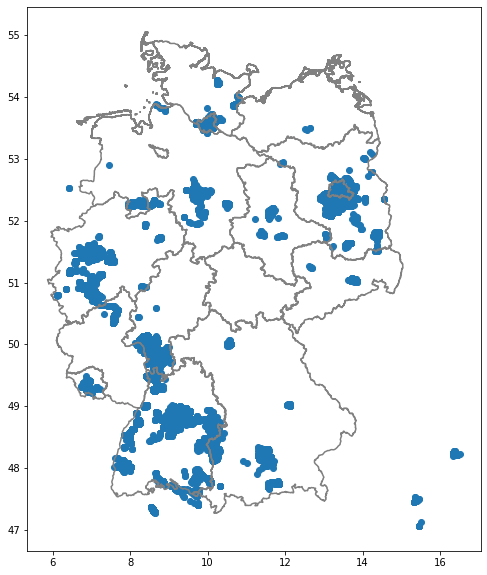

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)

bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.boundary.plot(ax=ax, color='gray')

---
<a id="pre">pre processing<a> 


In [8]:
# from m in cm
gdf['distance_overtaker']=gdf['distance_overtaker']*100
gdf['distance_stationary']=gdf['distance_stationary']*100

In [9]:
#adding bins of distance_overtaker

#50cm
bins = [0,50,100,150,200,250,400]
labels = ['<50','50-100','100-150','150-200','200-250','>250']
gdf['distance_overtaker_binned'] = pd.cut(gdf['distance_overtaker'], bins=bins, labels=labels)

#25cm
bins = list(range(0,260,25))
bins.append(400)
labels = ['<25','25-50','50-75','75-100','100-125','125-150','150-175','175-200','200-225','225-250','>250']
gdf['distance_overtaker_binned_25'] = pd.cut(gdf['distance_overtaker'], bins=bins, labels=labels)

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

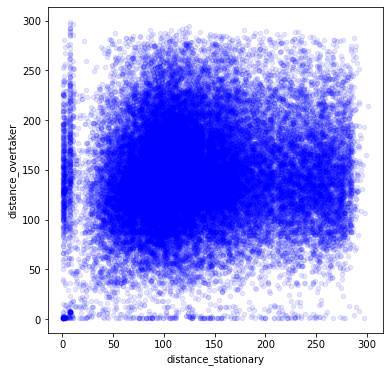

In [10]:
#left-right overview
#kaputte ultraschallsensoren werden sichtbar, häufung von Werten <10cm
gdf.plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1, figsize=(6,6), color='blue')

In [11]:
# remove all datapoints with meassuerements below 15cm to clean wrong messurements due to ultrasonic sensor issues
gdf=gdf[~(gdf.distance_overtaker<15)&~(gdf.distance_stationary<15)].copy()

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

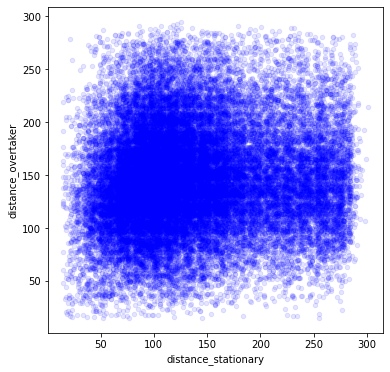

In [12]:
# wenn man alle werte unter 15cm rausfiltert sieht es plausibel aus
gdf.plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1, figsize=(6,6), color='blue')

---
<a id="osm">load OSM-Network<a> 

In [13]:
# getting proprocessed germanwide OSM-Netwerk 
# (parsing time ~5-10min)

# see notebook "getHighwaysOSM.ipynb"

# methodology as described here:
#https://github.com/vizsim/osm_analyse_strassennamen

osm_netz=gpd.read_file(r"..\..\osm_processing\highways_germany_zuNah.gpkg", layer='lines')

In [14]:
osm_netz

,osm_id,name,highway,ref,maxspeed,lanes,lit,surface,bicycle,cycleway,...,smoothness,oneway,cycleway_both_lane,cycleway_right_lane,cycleway_left_lane,parking_lane_both,parking_lane_left,parking_lane_right,other_tags,geometry
0,92,Eigenheimstraße,residential,None,30,None,yes,asphalt,None,None,...,None,None,None,None,None,None,None,None,"""maxweight""=>""3.5"",""maxweight:destination""=>""n...","LINESTRING (13.73698 51.01663, 13.73752 51.016..."
1,93,Eigenheimberg,residential,None,30,None,yes,asphalt,None,None,...,None,None,None,None,None,None,None,None,"""maxweight""=>""3.5"",""maxweight:destination""=>""n...","LINESTRING (13.73939 51.01669, 13.73967 51.016..."
2,99,None,tertiary,None,None,None,yes,asphalt,None,None,...,None,None,None,None,None,None,None,None,"""junction""=>""roundabout"",""lane_markings""=>""no""...","LINESTRING (11.36639 48.17411, 11.36643 48.174..."
3,100,None,secondary,St 2069,100,None,None,asphalt,use_sidepath,None,...,None,None,None,None,None,None,None,None,"""foot""=>""use_sidepath"",""junction""=>""roundabout...","LINESTRING (11.33035 48.18011, 11.33028 48.180..."
4,103,Altmockritz,residential,None,5,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"""postal_code""=>""01217"",""source:maxspeed""=>""sign""","LINESTRING (13.74127 51.01615, 13.74149 51.016..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737740,1109134415,None,footway,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"""footway""=>""sidewalk""","LINESTRING (7.84410 47.98632, 7.84415 47.98636..."
9737741,1109134416,None,footway,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"""footway""=>""sidewalk""","LINESTRING (7.84433 47.98790, 7.84433 47.98795..."
9737742,1109134417,None,footway,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"""footway""=>""sidewalk""","LINESTRING (7.84453 47.98793, 7.84454 47.98798..."
9737743,1109134418,None,footway,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"""footway""=>""sidewalk""","LINESTRING (7.84454 47.98798, 7.84584 47.98816..."


<AxesSubplot:>

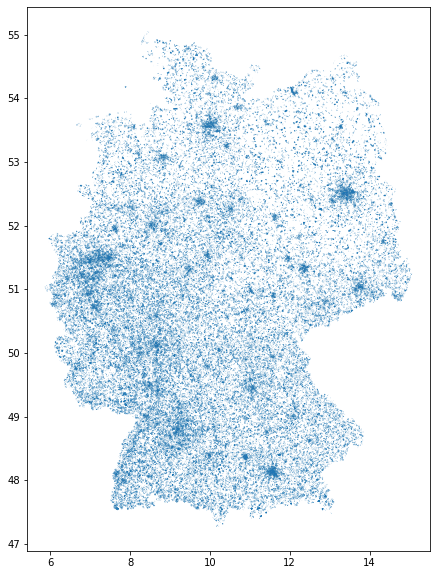

In [15]:
# plot every 100th way
osm_netz[::100].plot(figsize=(10,10))

---
<a id="merge">merge OSM-Network with OBS data<a> 

In [20]:
# drop OBS-datapoints that are not linked to OSM-link
gdf=gdf.dropna(subset=['way_id']).copy()

In [21]:
gdf['way_id']=gdf['way_id'].astype(int)
osm_netz['osm_id']=osm_netz['osm_id'].astype(int)

In [22]:
gdf_OSMmerged=gdf.merge(osm_netz, left_on='way_id', right_on='osm_id')
gdf_OSMmerged

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry_x,portal,distance_overtaker_binned,...,smoothness,oneway,cycleway_both_lane,cycleway_right_lane,cycleway_left_lane,parking_lane_both,parking_lane_left,parking_lane_right,other_tags,geometry_y
0,182.0,NaN,-1,28496022,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb,150-200,...,good,None,None,None,None,parallel,None,None,"""foot""=>""use_sidepath"",""lane_markings""=>""yes"",...","LINESTRING (13.42746 52.47469, 13.42748 52.474..."
1,71.0,NaN,-1,28496022,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb,50-100,...,good,None,None,None,None,parallel,None,None,"""foot""=>""use_sidepath"",""lane_markings""=>""yes"",...","LINESTRING (13.42746 52.47469, 13.42748 52.474..."
2,119.0,74.0,1,28496022,4.994918,3.944444,2022-05-10 06:12:56+00:00,POINT (13.42753 52.47456),bbb,100-150,...,good,None,None,None,None,parallel,None,None,"""foot""=>""use_sidepath"",""lane_markings""=>""yes"",...","LINESTRING (13.42746 52.47469, 13.42748 52.474..."
3,149.0,NaN,1,28496022,5.283753,3.305556,2022-05-05 06:06:42+00:00,POINT (13.42762 52.47439),bbb,100-150,...,good,None,None,None,None,parallel,None,None,"""foot""=>""use_sidepath"",""lane_markings""=>""yes"",...","LINESTRING (13.42746 52.47469, 13.42748 52.474..."
4,169.0,NaN,1,28496022,5.052679,3.944444,2022-05-05 06:06:53+00:00,POINT (13.42786 52.47392),bbb,150-200,...,good,None,None,None,None,parallel,None,None,"""foot""=>""use_sidepath"",""lane_markings""=>""yes"",...","LINESTRING (13.42746 52.47469, 13.42748 52.474..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100471,148.0,198.0,1,39320393,1.370343,7.250000,2022-09-28 05:50:11+00:00,POINT (8.01634 52.26995),os,100-150,...,None,yes,None,None,None,None,None,None,None,"LINESTRING (8.01622 52.26958, 8.01631 52.26967..."
100472,189.0,94.0,1,254429971,0.285211,5.722222,2022-09-28 06:00:22+00:00,POINT (8.04871 52.28001),os,150-200,...,None,yes,None,None,None,None,None,None,"""lane_markings""=>""no"",""sidewalk""=>""right"",""sou...","LINESTRING (8.04791 52.27995, 8.04809 52.28005..."
100473,220.0,95.0,-1,7752586,3.737579,5.055556,2022-11-02 14:59:03+00:00,POINT (7.99315 52.25897),os,200-250,...,None,None,None,None,None,None,None,None,"""sidewalk""=>""both""","LINESTRING (7.99180 52.25798, 7.99192 52.25816..."
100474,126.0,109.0,-1,26733317,6.240770,4.805556,2022-10-04 05:07:51+00:00,POINT (8.04897 52.27981),os,100-150,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8.05178 52.27926, 8.05171 52.27923..."


---
<a id="analysis">OBS-OSM Analysis<a> 

    OSM tag: maxspeed

<AxesSubplot:xlabel='maxspeed'>

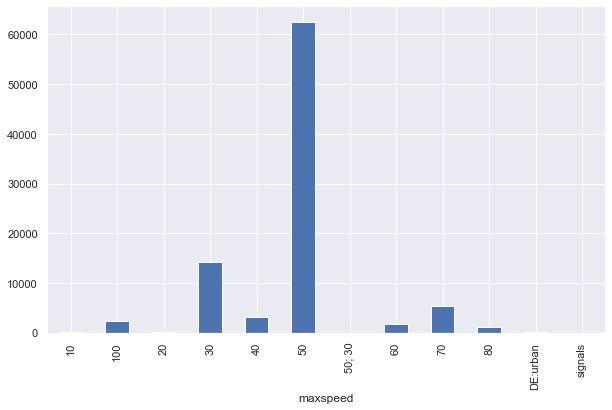

In [23]:
sns.set(rc={'figure.figsize':(10,6)})
gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].count().plot(kind='bar')

<AxesSubplot:xlabel='maxspeed'>

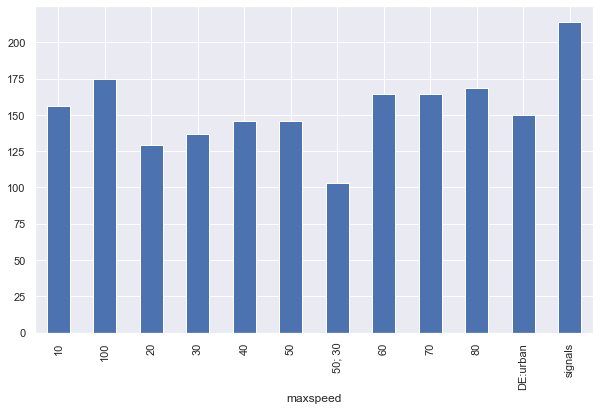

In [24]:
gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].median().plot(kind='bar')

In [25]:
#HELPER
##reorder column
#comparator function for sort
def mixs(num):
    try:
        ele = int(num)
        return (0, ele, '')
    except ValueError:
        return (1, num, '')

In [26]:
# set overall seaborn plot style
sns.set_context("talk")

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=85484)')

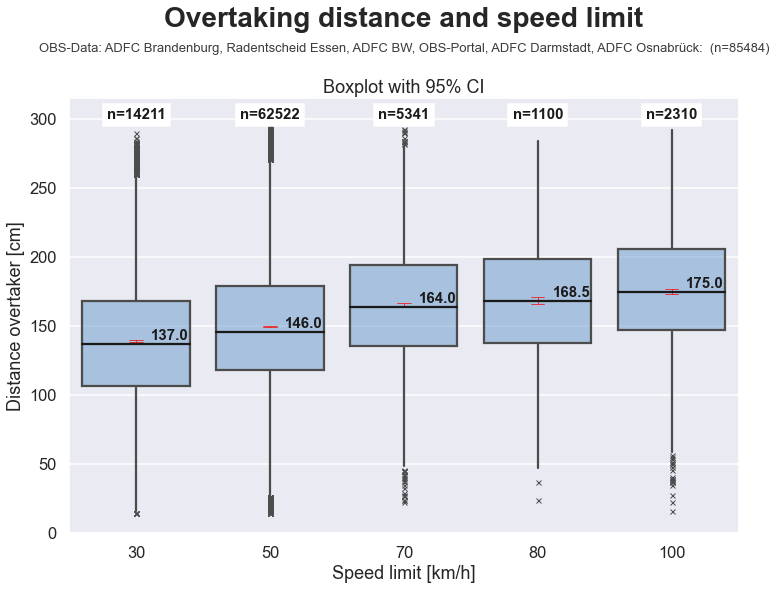

In [27]:
# PRODUCTION maxspeed distance

data_c_plot=gdf_OSMmerged

data_c_plot=data_c_plot[(data_c_plot.maxspeed.isin(['30','50','70','80','100'])) ].copy()#data_c_plot=data_c_plot[(data_c_plot.maxspeed.isin([30,50,70,80,100])) ]#.copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='maxspeed'
    
x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str = [i for i in x_ax_ordered_str if i is not None]
x_ax_ordered_str.sort(key=int)


fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
   # notch=True, 
    #linewidth=1.5,
    showcaps=False,
    flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, round(medians[xtick],1), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)


ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('Speed limit [km/h]')

ax.set(ylim=(0, 315))

#add overall title
ax.text(x=0.5, y=1.15, s='Overtaking distance and speed limit', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("plots\OBS_analysis_OSM_maxspeed_all.png", dpi=300, bbox_inches="tight") 

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=85484)')

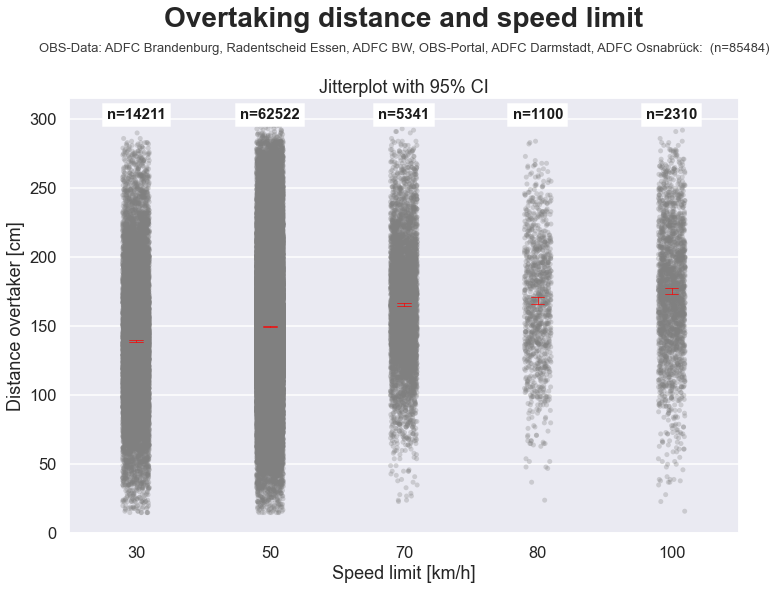

In [28]:
# PRODUCTION


data_c_plot=gdf_OSMmerged
data_c_plot=data_c_plot#[data_c_plot['portal']=='bbb']
data_c_plot=data_c_plot[(data_c_plot.maxspeed.isin(['30','50','70','80','100'])) ].copy()#data_c_plot=data_c_plot[(data_c_plot.maxspeed.isin([30,50,70,80,100])) ]#.copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='maxspeed'
    
#data_c_plot.Right_binned=data_c_plot.Right_binned.astype(str)
#data_c_plot=data_c_plot[(data_c_plot.Right_binned.isin(['(100, 120]','(80, 100]', '(40, 60]', '(60, 80]', '(20, 40]']))].copy()


x_ax_ordered_str=data_c_plot[x_ax].unique()
x_ax_ordered_str = [i for i in x_ax_ordered_str if i is not None]
x_ax_ordered_str.sort(key=int)



fig, ax =plt.subplots(
                      figsize=(12,8),
                     )


    
ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker",color="grey", alpha=0.3, ax=ax, zorder=1)
    
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)




ax.set(title='Jitterplot with 95% CI')
ax.set_ylabel('Distance overtaker [cm]')
ax.set_xlabel('Speed limit [km/h]')
#ax.set_xlabel(str(x_ax) + ' [m]')

#ax1.set(title='Boxplot')
#ax2.set(title='Confidence Interval')
#ax2.set_ylabel('')
ax.set(ylim=(0, 315))


#add overall title
ax.text(x=0.5, y=1.15, s='Overtaking distance and speed limit', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)


#fig.show()
#fig.savefig("plots\OBS_analysis_OSM_maxspeed_bbb_jitter.png", dpi=300, bbox_inches="tight") 

### maxspeed for Brandenburg

In [29]:
# cleanup maxspeed attribute
gdf_OSMmerged.maxspeed=gdf_OSMmerged.maxspeed.str.replace('DE:urban','50')

In [30]:
maxspeed_counts=gdf_OSMmerged[gdf_OSMmerged.portal=='bbb'].groupby('maxspeed')['distance_overtaker'].count()

In [31]:
maxspeed_counts=maxspeed_counts.reset_index().rename(columns={'distance_overtaker':'counts'})
maxspeed_counts

,maxspeed,counts
0,100,291
1,20,8
2,30,2107
3,40,21
4,50,9734
5,60,75
6,70,1224
7,80,273


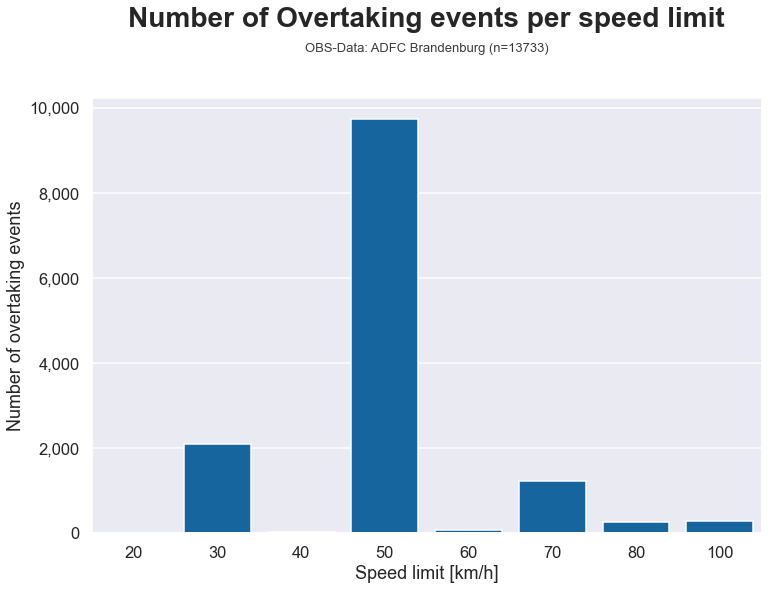

In [32]:


import matplotlib.ticker as ticker



x_ax='maxspeed'

x_ax_ordered_str=maxspeed_counts[x_ax].unique()
x_ax_ordered_str = [i for i in x_ax_ordered_str if i is not None]
x_ax_ordered_str.sort(key=mixs)

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=maxspeed_counts, x=x_ax, y='counts',
    color='#0069B4',
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Speed limit [km/h]')


ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))


#add overall title
ax.text(x=0.5, y=1.15, s='Number of Overtaking events per speed limit', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(maxspeed_counts.counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots/OBS_analysis_osm_maxspeed_counts_bbb.png", dpi=300, bbox_inches="tight")

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg (n=14404)')

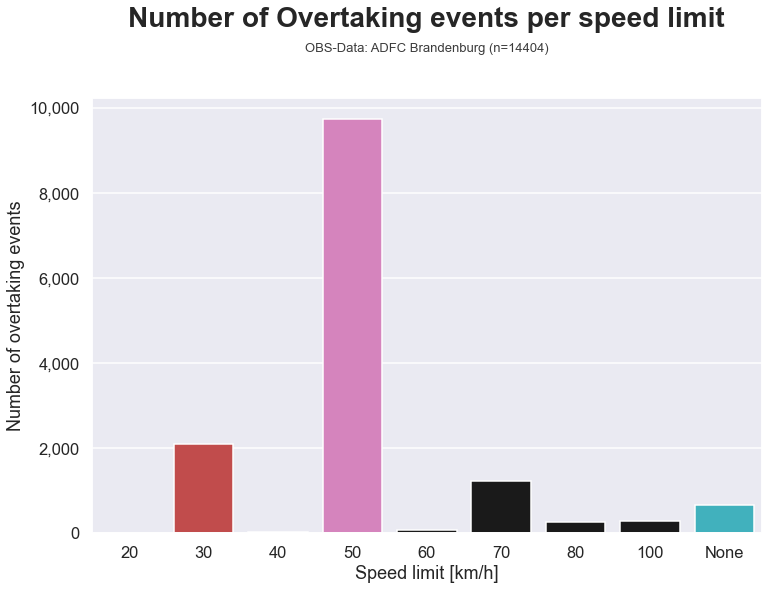

In [34]:
# number of events custom color for samplemap (see map below)


maxspeed_counts=gdf_OSMmerged[gdf_OSMmerged.portal=='bbb'].groupby('maxspeed', dropna=False)['distance_overtaker'].count()

maxspeed_counts=maxspeed_counts.reset_index().rename(columns={'distance_overtaker':'counts'})
maxspeed_counts=maxspeed_counts.fillna('None')
maxspeed_counts

import matplotlib.ticker as ticker



x_ax='maxspeed'

x_ax_ordered_str=maxspeed_counts[x_ax].unique()
x_ax_ordered_str = [i for i in x_ax_ordered_str if i is not None]
x_ax_ordered_str.sort(key=mixs)

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=maxspeed_counts, x=x_ax, y='counts',
    #color=['#0069B4','#42b7bd','#0069B4','#42b7bd','#0069B4','#42b7bd','#0069B4','#42b7bd'],
    palette=['#3382ba','#d53839','k','#e277c2','k','k','k','k','#2cc2d2'],
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Speed limit [km/h]')


ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))



ax.text(x=0.5, y=1.15, s='Number of Overtaking events per speed limit', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(maxspeed_counts.counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots/OBS_analysis_osm_maxspeed_counts_bbb_colors.png", dpi=300, bbox_inches="tight")

---
<a id="cycleways">cycleways<a> 

## rearranging osm-cyclinginfra
* direction (1,-1, oneway?)
* diffrent cycling tags 
* handel left,right,both

In [38]:
# diffrent cyclewaytags
cyclewaytags=[c for c in gdf_OSMmerged.columns if 'cycleway' in c]
cyclewaytags

['cycleway',
 'cycleway_both',
 'cycleway_left',
 'cycleway_right',
 'cycleway_both_lane',
 'cycleway_right_lane',
 'cycleway_left_lane']

In [39]:
# provisionally approach to simplyfy osm-cyclinginfa attributes to one attribute (cycleway_mod_dir)
# works pretty ok for most

for i,row in gdf_OSMmerged.iterrows():
    str_=''
    
    if row['direction']==1:
        if row['cycleway'] is not None:
            str_+='cycleway:' + row['cycleway']
            #print(row['cycleway'])
        if row['cycleway_both'] is not None:
            str_+='cycleway:' + row['cycleway_both']
        if row['cycleway_right'] is not None:
            str_+='cycleway:' + row['cycleway_right']
        #print(str_)

        # ersetze str_ wenn cycleway_x_lane, weil es cycleway:lane impliziert
        if row['cycleway_both_lane'] is not None:
            str_='cycleway:lane:both:' + row['cycleway_both_lane']
        #print(str_)
        if row['cycleway_right_lane'] is not None:
            str_='cycleway:lane:' + row['cycleway_right_lane']
        #print(str_)
            
    if row['direction']==-1:
        if row['cycleway'] is not None:
            str_+='cycleway:' + row['cycleway']
            #print(row['cycleway'])
        if row['cycleway_both'] is not None:
            str_+='cycleway:' + row['cycleway_both']
        if row['cycleway_left'] is not None:
            str_+='cycleway:' + row['cycleway_left']

        if row['cycleway_both_lane'] is not None:
            str_='cycleway:lane:' + row['cycleway_both_lane']
        if row['cycleway_left_lane'] is not None:
            str_='cycleway:lane:' + row['cycleway_left_lane']

    if str_!='':
        gdf_OSMmerged.at[i, 'cycleway_mod_dir'] = str_
        #print(str_)
        #print('')
    else:
        gdf_OSMmerged.at[i, 'cycleway_mod_dir'] = None

# clean some mess
gdf_OSMmerged.cycleway_mod_dir=gdf_OSMmerged.cycleway_mod_dir.str.replace(':both','')

In [41]:
gdf_OSMmerged.cycleway_right.value_counts()[:50]

lane            13466
no               2401
track            2304
separate         1023
shared_lane       606
share_busway      237
use_sidepath       36
shoulder            1
Name: cycleway_right, dtype: int64

In [42]:
gdf_OSMmerged.cycleway_left.value_counts()[:50]

lane                     2853
separate                 1273
no                       1074
track                     845
shared_lane               190
share_busway              167
opposite_track            106
opposite_lane              31
use_sidepath               16
opposite                    6
none                        2
opposite_share_busway       1
n                           1
sidepath                    1
lane, track                 1
Name: cycleway_left, dtype: int64

In [43]:
gdf_OSMmerged.cycleway_mod_dir.value_counts()[:50]

cycleway:no                                 22937
cycleway:lane                               10373
cycleway:lane:advisory                      10085
cycleway:lane:exclusive                      8703
cycleway:track                               4309
cycleway:separate                            2329
cycleway:shared_lane                          666
cycleway:share_busway                         257
cycleway:nocycleway:no                        238
cycleway:lane:pictogram                       220
cycleway:opposite                             187
cycleway:opposite_track                       171
cycleway:lanecycleway:lane                     88
cycleway:lane:soft_lane                        80
cycleway:use_sidepath                          62
cycleway:none                                  41
cyclewaycycleway:lane                          32
cycleway:segregated                            13
cycleway:shared                                12
cyclewaycycleway:track                         10


In [44]:
# remove "cycleway:" to make plot a bit nicer
gdf_OSMmerged.cycleway_mod_dir=gdf_OSMmerged.cycleway_mod_dir.str.replace('cycleway:','')

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=57663)')

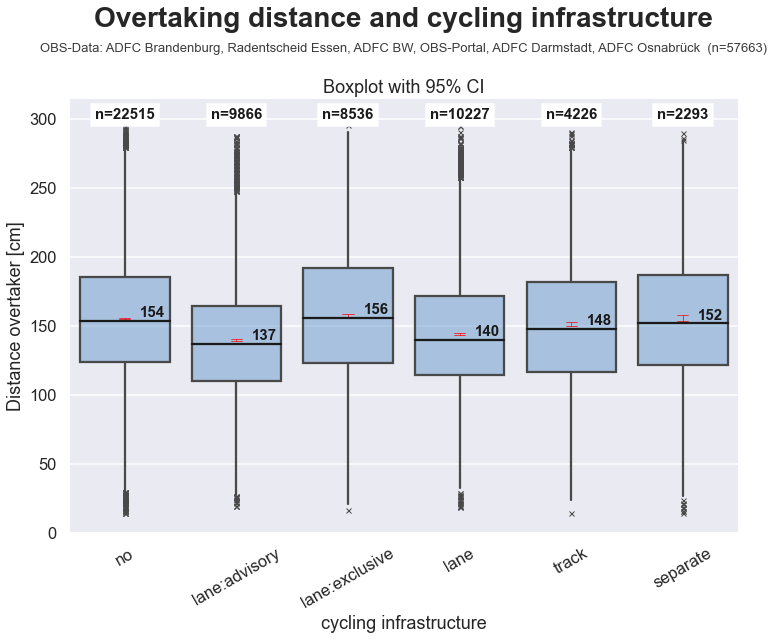

In [45]:
x_ax='cycleway_mod_dir'

data_c_plot=gdf_OSMmerged#[gdf_OSMmerged.portal=='bbb'].copy()

x_ax_ordered_str=list(data_c_plot[x_ax].value_counts()[:7].index)#data_c_plot[x_ax].unique()
x_ax_ordered_str = ['no', 'lane:advisory', 'lane:exclusive', 'lane', 'track', 'separate']
#x_ax_ordered_str.sort(key=mixs)
data_c_plot=data_c_plot[data_c_plot[x_ax].isin(x_ax_ordered_str)].copy()

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
   # notch=True, 
    showcaps=False,
    flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    #linewidth=1.5,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset,int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)


ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('cycling infrastructure')

ax.set(ylim=(0, 315))

ax.text(x=0.5, y=1.15, s='Overtaking distance and cycling infrastructure', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("plots\OBS_analysis_OSM_cycleway_all.png", dpi=300, bbox_inches="tight") 

#https://wiki.openstreetmap.org/wiki/Key:cycleway:lane

no -> keine Radinfra

lane:advisory-> Schutzstreifen   
lane:exclusive-> Radstreifen  
lane -> Fahrbahnradweg (nicht genauer bei OSM hinterlegt) 

track -> Bordsteinradweg

separate -> bspw. Straßenbegleitender Radweg außerorts oder Fußweg mit "Radfahrer frei"

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=57663)')

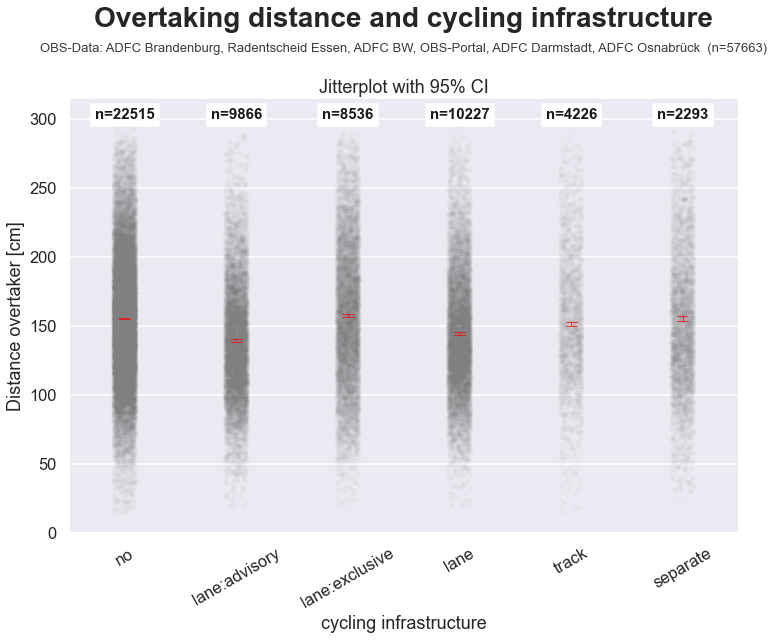

In [46]:
x_ax='cycleway_mod_dir'

#data_c_plot=gdf_OSMmerged[gdf_OSMmerged.portal=='bbb'].copy()
data_c_plot=gdf_OSMmerged#[gdf_OSMmerged.portal=='bbb'].copy()
#data_c_plot=data_c_plot[data_c_plot['portal']=='bbb']

x_ax_ordered_str=list(data_c_plot[x_ax].value_counts()[:7].index)#data_c_plot[x_ax].unique()
x_ax_ordered_str = ['no', 'lane:advisory', 'lane:exclusive', 'lane', 'track', 'separate']
#x_ax_ordered_str.sort(key=mixs)
data_c_plot=data_c_plot[data_c_plot[x_ax].isin(x_ax_ordered_str)].copy()

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )


ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker",color="grey", alpha=0.03, ax=ax, zorder=1)


# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)


ax.set(title='Jitterplot with 95% CI')
ax.set_ylabel('Distance overtaker [cm]')
ax.set_xlabel('cycling infrastructure')

ax.set(ylim=(0, 315))


ax.text(x=0.5, y=1.15, s='Overtaking distance and cycling infrastructure', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("plots\OBS_analysis_OSM_cycleway_all_jitter.png", dpi=300, bbox_inches="tight") 

---

In [160]:
# export dataset as gpkg
#gdf_OSMmerged_gdf = gpd.GeoDataFrame(gdf_OSMmerged, geometry='geometry_x', crs='EPSG:4326')
#gdf_OSMmerged_gdf[['geometry_x','cycleway_mod_dir']].to_file('gdf_OSMmerged_cycling.gpkg', driver='GPKG', layer='name')  

---
<a id="osm tags">osmtags<a> 

## OSM TAGS

In [48]:
#rel_tags= ['maxspeed', 'lanes', 'lit', 'surface', 'width', 'smoothness', 'oneway',
#       'bicycle', 'cycleway', 'cycleway_both', 'cycleway_left',
#       'cycleway_right', 
#       'cycleway_both_lane', 'cycleway_right_lane', 'cycleway_left_lane',
#       'parking_lane_both', 'parking_lane_left', 'parking_lane_right','cycleway_mod_dir']
rel_tags= ['maxspeed', 'lit', 'lanes','surface', 'width', 'smoothness', 'cycleway_mod_dir']
gdf_OSMmerged_bbb=gdf_OSMmerged[gdf_OSMmerged.portal=='bbb'].copy()
gdf_OSM_tags=gdf_OSMmerged_bbb[rel_tags].isna().sum().reset_index()
#gdf_OSM_tags

gdf_OSM_tags['share_tags']=(1-(gdf_OSM_tags[0]/len(gdf_OSMmerged_bbb)))#*100
gdf_OSM_tags['share_tags_inverse']=1-gdf_OSM_tags['share_tags']


gdf_OSM_tags['index']=gdf_OSM_tags['index'].str.replace('_',':')
gdf_OSM_tags['index']=gdf_OSM_tags['index'].str.replace('cycleway:mod:dir','cycleway (assembled)')

gdf_OSM_tags

,index,0,share_tags,share_tags_inverse
0,maxspeed,675,0.953535,0.046465
1,lit,6395,0.559785,0.440215
2,lanes,4158,0.713774,0.286226
3,surface,1192,0.917946,0.082054
4,width,14114,0.028430,0.971570
5,smoothness,8078,0.443932,0.556068
6,cycleway (assembled),3767,0.740690,0.259310


C:\Users\simon\AppData\Local\Temp/ipykernel_14348/3053321612.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:.0%}'.format(x) for x in vals])


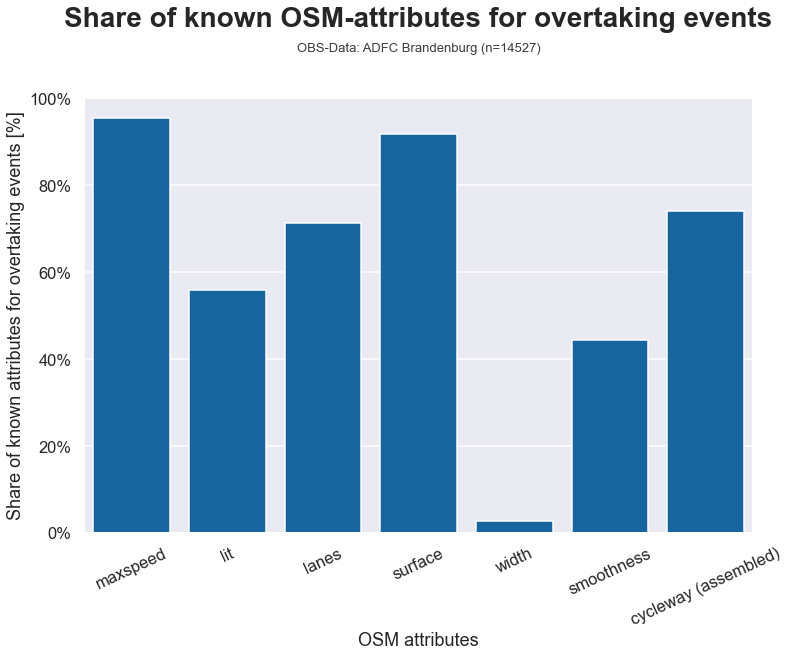

In [49]:
fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=gdf_OSM_tags, x='index', y='share_tags',
    color='#0069B4',# color='blue',
    #stacked=True,
   # hue=x_ax,
    #palette='RdYlGn',# palette='Spectral',
   # dodge=False,
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Share of known attributes for overtaking events [%]')
ax1.set_xlabel('OSM attributes')

#plt.legend(title='Overtaking distance [cm]')

#ax1.set_xticklabels(rotation=30)
plt.xticks(rotation=25)

# manipulate
vals = ax.get_yticks()
ax1.set_yticklabels(['{:.0%}'.format(x) for x in vals])

ax1.set(ylim=(0, 1))

#add overall title
#ax.text(x=0.5, y=1.1, s='Share of known OSM-attributes for overtaking events', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC XYX:  (n=" + str(len(gdf_OSMmerged))+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.15, s='Share of known OSM-attributes for overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=" + str(len(gdf_OSMmerged_bbb))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(len(gdf_OSMmerged_bbb))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)


#fig.savefig("OBS_analysis_OSM_attributes_avail.png", dpi=300) 

#fig.savefig("plots\OBS_analysis_OSM_knownAttributes_bbb.png", dpi=300, bbox_inches="tight") 

In [50]:
#rel_tags= ['maxspeed', 'lanes', 'lit', 'surface', 'width', 'smoothness', 'oneway',
#       'bicycle', 'cycleway', 'cycleway_both', 'cycleway_left',
#       'cycleway_right', 
#       'cycleway_both_lane', 'cycleway_right_lane', 'cycleway_left_lane',
#       'parking_lane_both', 'parking_lane_left', 'parking_lane_right','cycleway_mod_dir']
rel_tags= ['maxspeed', 'lit', 'lanes','surface', 'width', 'smoothness', 'cycleway_mod_dir']
#gdf_OSMmerged_bbb=gdf_OSMmerged[gdf_OSMmerged.portal=='bbb'].copy()
gdf_OSM_tags=gdf_OSMmerged[rel_tags].isna().sum().reset_index()
#gdf_OSM_tags

gdf_OSM_tags['share_tags']=(1-(gdf_OSM_tags[0]/len(gdf_OSMmerged)))#*100
gdf_OSM_tags['share_tags_inverse']=1-gdf_OSM_tags['share_tags']


gdf_OSM_tags['index']=gdf_OSM_tags['index'].str.replace('_',':')
gdf_OSM_tags['index']=gdf_OSM_tags['index'].str.replace('cycleway:mod:dir','cycleway (assembled)')

gdf_OSM_tags

,index,0,share_tags,share_tags_inverse
0,maxspeed,8058,0.919802,0.080198
1,lit,29701,0.704397,0.295603
2,lanes,31143,0.690045,0.309955
3,surface,7149,0.928849,0.071151
4,width,97251,0.032097,0.967903
5,smoothness,71340,0.289980,0.710020
6,cycleway (assembled),39586,0.606015,0.393985


C:\Users\simon\AppData\Local\Temp/ipykernel_14348/128120366.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:.0%}'.format(x) for x in vals])


Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=100476)')

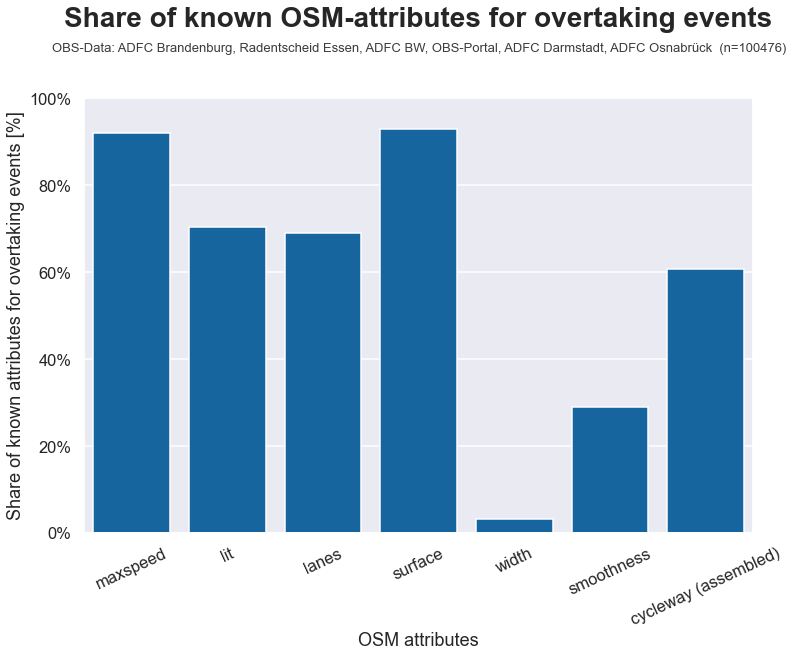

In [51]:
fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=gdf_OSM_tags, x='index', y='share_tags',
    color='#0069B4',# color='blue',
    #stacked=True,
   # hue=x_ax,
    #palette='RdYlGn',# palette='Spectral',
   # dodge=False,
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Share of known attributes for overtaking events [%]')
ax1.set_xlabel('OSM attributes')

#plt.legend(title='Overtaking distance [cm]')

#ax1.set_xticklabels(rotation=30)
plt.xticks(rotation=25)

# manipulate
vals = ax.get_yticks()
ax1.set_yticklabels(['{:.0%}'.format(x) for x in vals])

ax1.set(ylim=(0, 1))

#add overall title
#ax.text(x=0.5, y=1.1, s='Share of known OSM-attributes for overtaking events', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC XYX:  (n=" + str(len(gdf_OSMmerged))+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.15, s='Share of known OSM-attributes for overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=" + str(len(gdf_OSMmerged))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(len(gdf_OSMmerged_bbb))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)


#fig.savefig("OBS_analysis_OSM_attributes_avail.png", dpi=300) 
#fig.savefig("plots\OBS_analysis_OSM_knownAttributes_all.png", dpi=300, bbox_inches="tight") 

### availability of cycleway_mod_dir (for bbb)

In [52]:
cycleway_mod_dir_counts=gdf_OSMmerged_bbb.groupby('cycleway_mod_dir',dropna=False)['distance_overtaker'].count()

In [53]:
cycleway_mod_dir_counts=cycleway_mod_dir_counts.reset_index().rename(columns={'distance_overtaker':'counts'})
cycleway_mod_dir_counts.sort_values('counts', ascending=False)

,cycleway_mod_dir,counts
5,no,4504
17,NaN,3720
1,lane,1897
2,lane:advisory,1585
11,separate,1307
15,track,659
4,lane:exclusive,604
12,share_busway,82
14,shared_lane,15
0,cyclewaylane,15


In [54]:
cycleway_mod_dir_counts.sort_values('counts', ascending=False)[9:]['counts'].sum()

31

In [55]:
cycleway_mod_dir_counts=cycleway_mod_dir_counts.fillna('None')

In [56]:
cycleway_mod_dir_counts_slice=cycleway_mod_dir_counts.sort_values('counts', ascending=False)[:7]

In [57]:
other_cnt=cycleway_mod_dir_counts.sort_values('counts', ascending=False)[7:]['counts'].sum()


In [58]:
cycleway_mod_dir_counts_slice=cycleway_mod_dir_counts_slice.append({'cycleway_mod_dir':'other','counts':other_cnt}, ignore_index=True)

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg  (n=14527)')

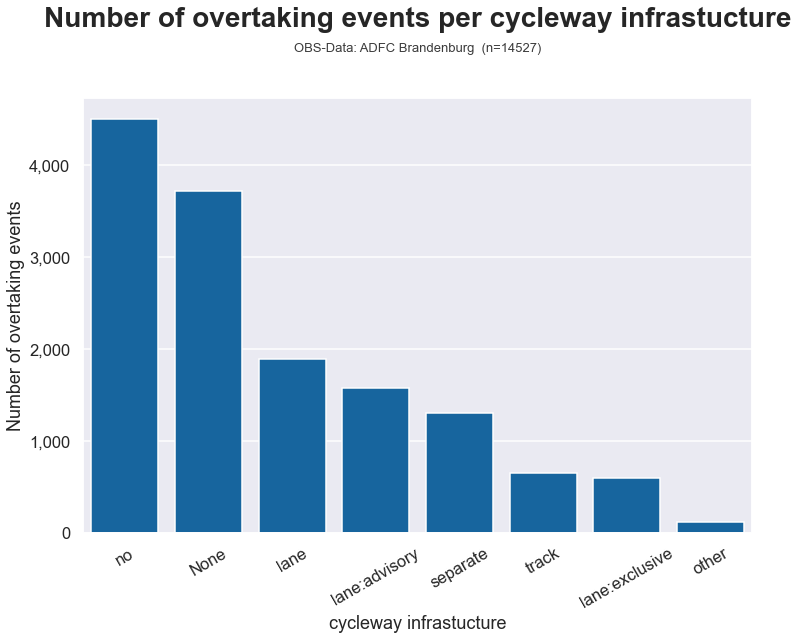

In [60]:
#sns.set(rc={'figure.figsize':(10,6)})
#gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].count().plot(kind='bar')

import matplotlib.ticker as ticker



x_ax='cycleway_mod_dir'

#x_ax_ordered_str=cycleway_mod_dir_counts.sort_values('counts', ascending=False)[:9][x_ax]
x_ax_ordered_str=cycleway_mod_dir_counts_slice[x_ax]



#x_ax_ordered_str=cycleway_mod_dir_counts[x_ax].unique()
#x_ax_ordered_str = [i for i in x_ax_ordered_str if i is not None]
#x_ax_ordered_str.sort(ascending=False)

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=cycleway_mod_dir_counts_slice, x=x_ax, y='counts',
    color='#0069B4',
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('cycleway infrastucture')


#ax1.yaxis.set_major_formatter(ticker.EngFormatter())
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))
ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)


#add overall title
#ax.text(x=0.5, y=1.1, s='Overtaking events per "cycleway" infrastucture', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(len(gdf_OSMmerged_bbb))+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.15, s='Number of overtaking events per cycleway infrastucture', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg  (n=" + str(len(gdf_OSMmerged_bbb))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("OBS_analysis_osm_maxspeed_counts.png", dpi=300)
#fig.savefig("plots\OBS_analysis_OSM_cyclewayEvents_bbb.png", dpi=300, bbox_inches="tight") 

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg  (n=14527)')

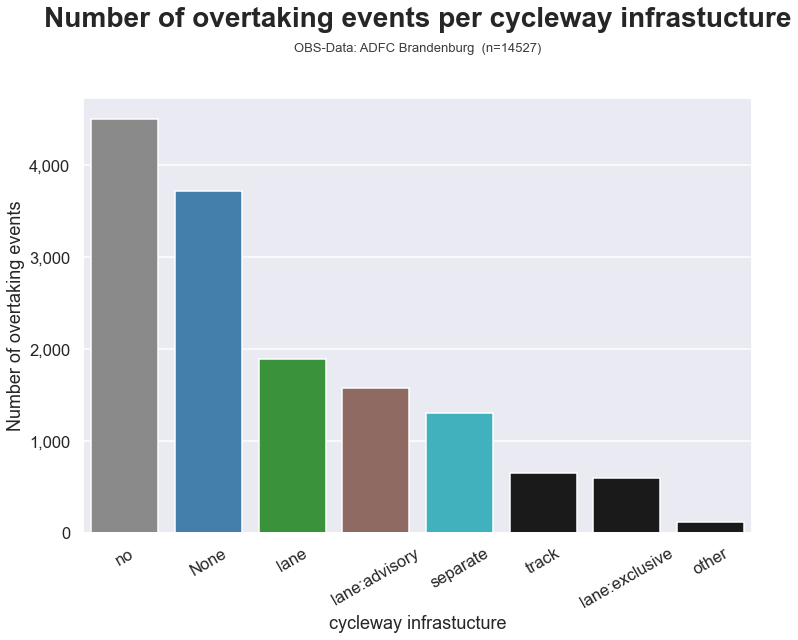

In [62]:

import matplotlib.ticker as ticker



x_ax='cycleway_mod_dir'

#x_ax_ordered_str=cycleway_mod_dir_counts.sort_values('counts', ascending=False)[:9][x_ax]
x_ax_ordered_str=cycleway_mod_dir_counts_slice[x_ax]



#x_ax_ordered_str=cycleway_mod_dir_counts[x_ax].unique()
#x_ax_ordered_str = [i for i in x_ax_ordered_str if i is not None]
#x_ax_ordered_str.sort(ascending=False)

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=cycleway_mod_dir_counts_slice, x=x_ax, y='counts',
    #color='#0069B4',
     palette=['#8a8a8a','#3382ba','#2ca02c','#95655b','#2cc2d2','k','k','k','k'],
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('cycleway infrastucture')


#ax1.yaxis.set_major_formatter(ticker.EngFormatter())
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))
ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)


#add overall title

ax.text(x=0.5, y=1.15, s='Number of overtaking events per cycleway infrastucture', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg  (n=" + str(len(gdf_OSMmerged_bbb))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)


#fig.savefig("plots\OBS_analysis_OSM_cyclewayEvents_bbb.png", dpi=300, bbox_inches="tight") 

---
<a id="maps">sample maps<a> 

## MAPS

In [64]:
# create small sample maps to understand tagging and merging of osm and obs

In [65]:
df_location = pd.DataFrame({'name':'KW','longitude': [13.6245763], 'latitude': [52.2971026]})
gdf_location  = gpd.GeoDataFrame(df_location , geometry=gpd.points_from_xy( df_location['longitude'],df_location['latitude']), crs=4326)

gdf_location = gdf_location.to_crs(32633)
gdf_location_buffer =gdf_location.copy()
gdf_location_buffer.geometry=gdf_location.buffer(500)

gdf_location_buffer=gdf_location_buffer.to_crs(4326)

In [66]:
gdf_OSMmerged_bbb[['geometry_x','cycleway_mod_dir']]

,geometry_x,cycleway_mod_dir
0,POINT (13.42786 52.47392),no
1,POINT (13.42766 52.47430),no
2,POINT (13.42753 52.47456),no
3,POINT (13.42762 52.47439),no
4,POINT (13.42786 52.47392),no
...,...,...
14773,POINT (13.52152 52.36479),separate
14774,POINT (13.36614 52.54229),no
14775,POINT (13.61395 52.34502),no
14776,POINT (13.52560 52.36576),separate


In [76]:

gdf_OSMmerged_bbb_  = gpd.GeoDataFrame(gdf_OSMmerged_bbb[['geometry_x','cycleway_mod_dir']] , geometry='geometry_x', crs=4326)


kw = gpd.clip(gdf_OSMmerged_bbb_, gdf_location_buffer)

In [77]:
kw=kw.copy()
kw['cycleway_mod_dir']=kw.cycleway_mod_dir.fillna('None')

In [78]:
# Imports
import contextily as ctx


# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(10, 10))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.3, edgecolor='white', linewidths=1, figsize=(15,15))
    # Layer 2:
    args[1].plot(ax=ax, column='cycleway_mod_dir', alpha=0.9, zorder=2, legend=True,legend_kwds={'title': 'cycleway            '}) # https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
    
    # Contextily basemap:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # Turn off axis
    ax.axis('off')
    
    
    #plt.title(title)
    ax.text(x=0.5, y=1.07, s='Sample map: \nOvertaking events per cycleway infrastucture', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=1.03, s="OBS-Data: ADFC Brandenburg, sample KW  (n=" + str(len(args[1]))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)
    
    # Save as file
    #fig.savefig("plots\OBS_analysis_OSM_cyclewayEvents_maps_KW.png", dpi=300, bbox_inches="tight") 
    
    layered_map = plt.show()
    return(layered_map)

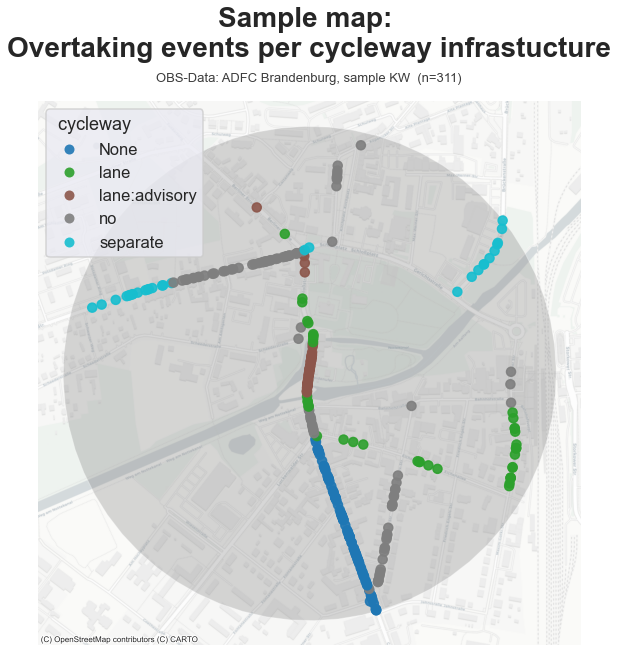

In [79]:
makeLayeredMap(gdf_location_buffer,kw)

In [80]:

gdf_OSMmerged_bbb_  = gpd.GeoDataFrame(gdf_OSMmerged_bbb[['geometry_x','maxspeed']] , geometry='geometry_x', crs=4326)

kw = gpd.clip(gdf_OSMmerged_bbb_, gdf_location_buffer)

In [81]:
kw=kw.copy()
kw.maxspeed=kw.maxspeed.fillna('None')

In [82]:
# Imports
import contextily as ctx


# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(10, 10))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.3, edgecolor='white', linewidths=1, figsize=(15,15))
    # Layer 2:
    args[1].plot(ax=ax, column='maxspeed', alpha=0.9, zorder=2, legend=True,legend_kwds={'title': 'maxspeed'})

    
    # Contextily basemap:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # Turn off axis
    ax.axis('off')
    
    

    
    ax.text(x=0.5, y=1.07, s='Sample map: \nOvertaking events per speed limit (maxspeed)', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=1.03, s="OBS-Data: ADFC Brandenburg, sample KW  (n=" + str(len(args[1]))+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)
    
    # Save as file
    #fig.savefig("plots\OBS_analysis_OSM_maxspeedEvents_maps_KW.png", dpi=300, bbox_inches="tight") 
    
    layered_map = plt.show()
    return(layered_map)

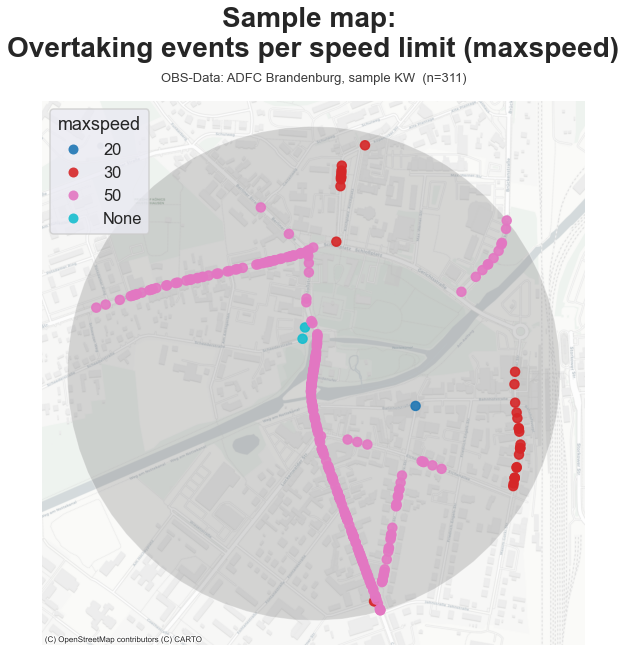

In [83]:
makeLayeredMap(gdf_location_buffer,kw)

---
<a id="singleosm">analysis of single (or several) OSM ways<a> 

In [85]:
# KW: way 23054176

In [86]:
import matplotlib.ticker as ticker
sns.set_context("talk")

In [87]:
gdf_thisWay=gdf_OSMmerged[gdf_OSMmerged.way_id==23054176]
histo=gdf_thisWay.groupby('distance_overtaker_binned')['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})
histo

,distance_overtaker_binned,counts
0,<50,0
1,50-100,12
2,100-150,27
3,150-200,8
4,200-250,1
5,>250,0


In [88]:
round(histo[:3]['counts'].sum()/histo['counts'].sum(), 3)*100

81.2

In [89]:
sns.set_context("talk")

Text(0.5, 1.02, 'OBS-Data: ADFC Brandenburg (n=48)')

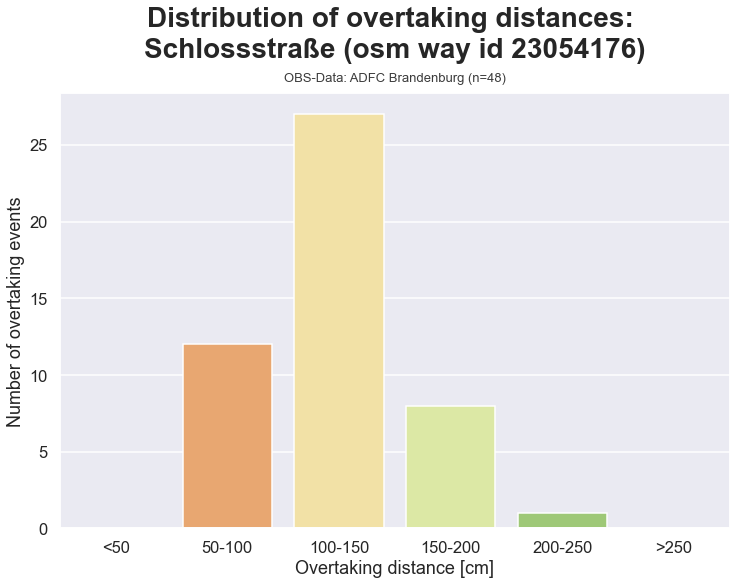

In [90]:
#sns.set(rc={'figure.figsize':(10,6)})
#gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].count().plot(kind='bar')

x_ax='distance_overtaker_binned'

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=histo, x=x_ax, y='counts',
    #color='blue',
    hue=x_ax,
    palette='RdYlGn',# palette='Spectral',
    dodge=False,
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Overtaking distance [cm]')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

#plt.legend(title='Overtaking distance [cm]')
ax1.legend_.remove()

#add overall title
#ax.text(x=0.5, y=1.1, s='Distribution of overtaking distances: Schlossstraße (osm way id 23054176)', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(histo.counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.07, s='Distribution of overtaking distances: \nSchlossstraße (osm way id 23054176)', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.02, s="OBS-Data: ADFC Brandenburg (n=" + str(histo.counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots\OBS_analysis_histogram_KW_schlossstr.png", dpi=200, bbox_inches="tight")

In [91]:
gdf_thisWay=gdf_OSMmerged[gdf_OSMmerged.way_id==565095154]
histo=gdf_thisWay.groupby('distance_overtaker_binned')['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})
histo

,distance_overtaker_binned,counts
0,<50,0
1,50-100,10
2,100-150,38
3,150-200,32
4,200-250,11
5,>250,0


In [95]:
round(histo[:3]['counts'].sum()/histo['counts'].sum(), 3)*100

36.1

Text(0.5, 1.02, 'OBS-Data: ADFC Brandenburg (n=91)')

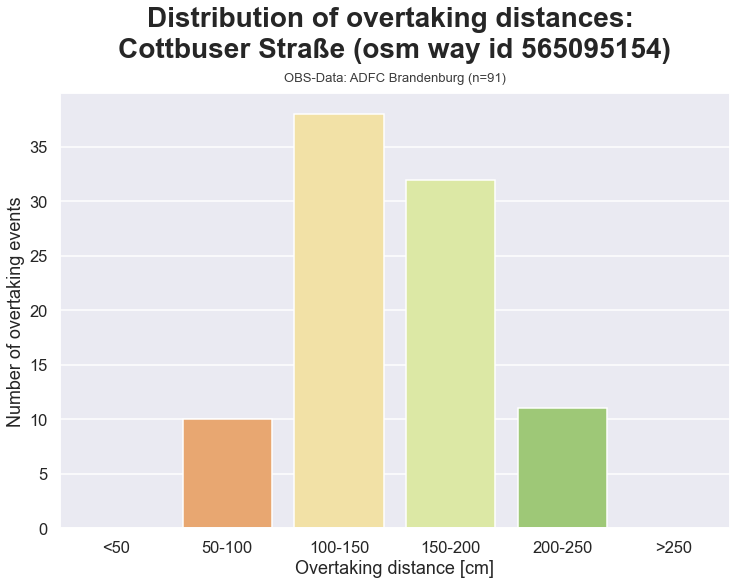

In [93]:
#sns.set(rc={'figure.figsize':(10,6)})
#gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].count().plot(kind='bar')

x_ax='distance_overtaker_binned'

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=histo, x=x_ax, y='counts',
    #color='blue',
    hue=x_ax,
    palette='RdYlGn',# palette='Spectral',
    dodge=False,
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Overtaking distance [cm]')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

#plt.legend(title='Overtaking distance [cm]')
ax1.legend_.remove()

#add overall title
#ax.text(x=0.5, y=1.1, s='Distribution of overtaking distances: Cottbuser Straße (osm way id 565095154)', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(histo.counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.07, s='Distribution of overtaking distances: \nCottbuser Straße (osm way id 565095154)', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.02, s="OBS-Data: ADFC Brandenburg (n=" + str(histo.counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots\OBS_analysis_histogram_KW_cottbuser.png", dpi=200, bbox_inches="tight")

In [96]:
gdf_thisWay=gdf_OSMmerged[(gdf_OSMmerged.way_id==5336788) & (gdf_OSMmerged.direction==1) ]
histo=gdf_thisWay.groupby('distance_overtaker_binned')['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})
histo

,distance_overtaker_binned,counts
0,<50,0
1,50-100,0
2,100-150,13
3,150-200,17
4,200-250,5
5,>250,1


In [97]:
round(histo[:3]['counts'].sum()/histo['counts'].sum(), 3)*100

36.1

Text(0.5, 1.02, 'OBS-Data: ADFC Brandenburg (n=36)')

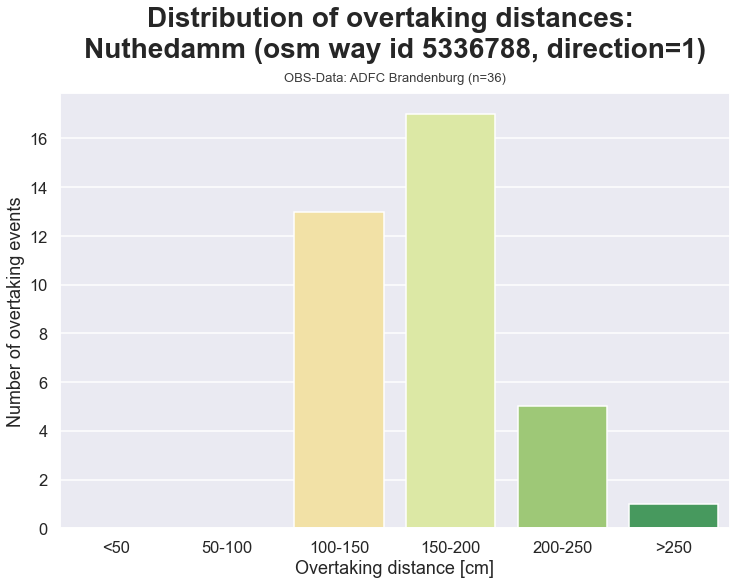

In [99]:
#sns.set(rc={'figure.figsize':(10,6)})
#gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].count().plot(kind='bar')

x_ax='distance_overtaker_binned'

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=histo, x=x_ax, y='counts',
    #color='blue',
    hue=x_ax,
    palette='RdYlGn',# palette='Spectral',
    dodge=False,
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Overtaking distance [cm]')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

#plt.legend(title='Overtaking distance [cm]')
ax1.legend_.remove()
#add overall title
#ax.text(x=0.5, y=1.1, s='Distribution of overtaking distances: Nuthedamm (osm way id 5336788, direction=1)', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(histo.counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.07, s='Distribution of overtaking distances: \nNuthedamm (osm way id 5336788, direction=1)', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.02, s="OBS-Data: ADFC Brandenburg (n=" + str(histo.counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots\OBS_analysis_histogram_Nuthedamm_1.png", dpi=200, bbox_inches="tight")

In [100]:
gdf_thisWay=gdf_OSMmerged[(gdf_OSMmerged.way_id==5336788) & (gdf_OSMmerged.direction==-1) ]
histo=gdf_thisWay.groupby('distance_overtaker_binned')['distance_overtaker'].count().reset_index().rename(columns={'distance_overtaker':'counts'})
histo

,distance_overtaker_binned,counts
0,<50,1
1,50-100,4
2,100-150,29
3,150-200,16
4,200-250,1
5,>250,0


In [101]:
round(histo[:3]['counts'].sum()/histo['counts'].sum(), 3)*100

66.7

Text(0.5, 1.02, 'OBS-Data: ADFC Brandenburg (n=51)')

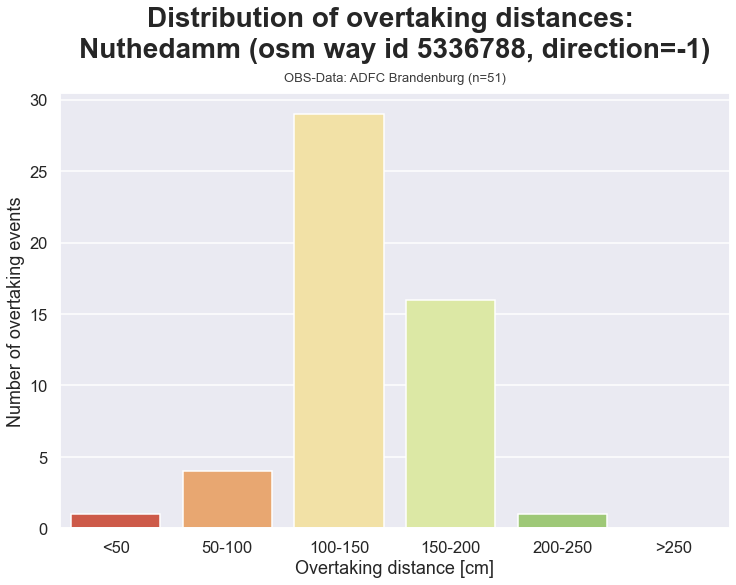

In [102]:
#sns.set(rc={'figure.figsize':(10,6)})
#gdf_OSMmerged.groupby('maxspeed')['distance_overtaker'].count().plot(kind='bar')

x_ax='distance_overtaker_binned'

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.barplot(
    data=histo, x=x_ax, y='counts',
    #color='blue',
    hue=x_ax,
    palette='RdYlGn',# palette='Spectral',
    dodge=False,
   # notch=True, 
    #showcaps=False,
    #flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    #boxprops={"facecolor": (.4, .6, .8, .5)},
    #medianprops={"color": "k"},
    ax=ax)

ax1.set_ylabel('Number of overtaking events')
ax1.set_xlabel('Overtaking distance [cm]')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

#plt.legend(title='Overtaking distance [cm]')

ax1.legend_.remove()
#add overall title
#ax.text(x=0.5, y=1.1, s='Distribution of overtaking distances: Nuthedamm (osm way id 5336788, direction=1)', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(histo.counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.07, s='Distribution of overtaking distances: \nNuthedamm (osm way id 5336788, direction=-1)', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.02, s="OBS-Data: ADFC Brandenburg (n=" + str(histo.counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots\OBS_analysis_histogram_Nuthedamm_-1.png", dpi=200, bbox_inches="tight")